In [30]:
# We will try to predict, whether a client of a bank is going to leave the bank or not,
# within 6 months, based on certain features. The dataset can be found at superdatascience.com
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [16]:
# Importing our dataset
dataset = pd.read_csv('C:/Users/tolaros/Desktop/Churn_Modelling.csv')

In [18]:
# Exploring
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# We have no missing values, thanks to data preprocessing of the owner
# Selecting Features: We will exclude the first three columns (RowNumber,CustomerId,Surname), that have 
# no impact whatsoever on the possibility of someone leaving the bank and we choose to encode the Geography 
# and Gender columns(columns 4 and 5), because we want to use them. All the other columns are in numeric type,
#so let's begin. Our target column is "Exited'

In [21]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [22]:
#####   ENCODING CATEGORICAL DATA   #####
# The columns we need to encode, have changed position in the X object. Now, their positions are 1 and 2.
# Encoding of the first variable 'Geography'
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Geog = LabelEncoder()
X[:, 1] = labelencoder_Geog.fit_transform(X[: , 1])

In [23]:
# If we take a look at X now, we can see that each country has a value instead of the country name
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ..., 
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [24]:
# We will do the same for the Gender column
labelencoder_Gend = LabelEncoder()
X[:, 2] = labelencoder_Gend.fit_transform(X[: ,2 ])

In [25]:
# The column with the countries, has values 0,1,2 , BUT they are not ordinal (meaning the 2 value is not
# greater or "better" than the 0 value). Still, our model, can not and will not understand this detail.
# To avoid this confusion, we will create dummy variables, using onehotencoder
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()

In [26]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, stratify = y, random_state=0)

In [28]:
# We will use three classifiers: RandomForestClassifier, LogisticRegression and XGboost
# Importing the classifiers
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(random_state = 42)
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=42)
import xgboost as xgb
from xgboost import XGBClassifier
classifier3 = XGBClassifier(random_state = 42)

In [29]:
# We will compare the f1 score,the accuracy and the precision of each one.
classifierslist = [classifier1, classifier2, classifier3]
f1list = []
acclist = []
preclist = []
for classifier in classifierslist:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    acc = accuracy_score(y_test, y_pred)
    from sklearn.metrics import precision_score
    ps = precision_score(y_test, y_pred)
    f1 = f1_score(y_test , y_pred)
    f1list.append(f1)
    acclist.append(acc)
    preclist.append(ps)
    
print(f1list,acclist,preclist)
pd.Series(f1list,acclist,preclist)
pd.Series(f1list).p;ot(kind = 'bar')


[0.55538221528861154, 0.0048899755501222494, 0.56651017214397492] [0.85750000000000004, 0.79649999999999999, 0.86150000000000004] [0.76068376068376065, 0.5, 0.78017241379310343]


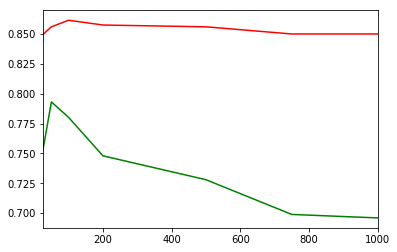

In [34]:
# We can see that the XGboost classifier is slightly better than the RandomForestClassifier, both in accuracy
# and precision. Let's try to quickly optimize it,"tweaking" two common hyperparameters, n_estimators and 
# max_depth. By default the n_estimators is set to 100. We will check some other cases and see how accuracy
# and precision behave
precision = []
accuracy = []
n_estimators = [25,50,100,200,500,750,1000]
for i in n_estimators:
    classifier = XGBClassifier(random_state = 42 , n_estimators = i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import precision_score  
    ps = precision_score(y_test, y_pred)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    precision.append(ps)
    accuracy.append(acc)
    
pd.Series(precision, n_estimators).plot(color = 'green')
pd.Series(accuracy, n_estimators).plot(color = 'red')

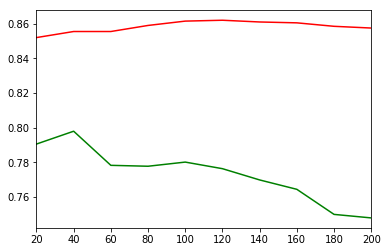

In [37]:
# Accuracy reaches a high at approx. n_estimators = 100.If we increase the n_estimators above 100, 
# the accuracy decreases at a very low rate(still above 84%) but the precision decreases substantially. 
# So let's see what happens for values of n_estimators  between 0-200
precision = []
accuracy = []
n_estimators = [20,40,60,80,100,120,140,160,180,200]
for i in n_estimators:
    classifier = XGBClassifier(random_state = 42 , n_estimators = i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import precision_score  
    ps = precision_score(y_test, y_pred)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    precision.append(ps)
    accuracy.append(acc)
    
pd.Series(precision, n_estimators).plot(color = 'green')
pd.Series(accuracy, n_estimators).plot(color = 'red') 

In [40]:
prec = pd.Series(precision, n_estimators)
prec

20     0.790576
40     0.797980
60     0.778302
80     0.777778
100    0.780172
120    0.776371
140    0.769874
160    0.764463
180    0.750000
200    0.747967
dtype: float64

In [42]:
accur = pd.Series(accuracy, n_estimators)
accur

20     0.8520
40     0.8555
60     0.8555
80     0.8590
100    0.8615
120    0.8620
140    0.8610
160    0.8605
180    0.8585
200    0.8575
dtype: float64

In [ ]:
# We have a dilemma. Accuracy is best at 120, but precision is best at 40. I will choose to stick
# with the precision metric (my decision is controversial), because the decline of accuracy,is 
# (0.862-0.8555)/0.862 = 0.008 ,less than 1%, while the increase in precision is, (0.798-0.776)/0.776
# =0.283 almost 3%, AND personally I am mostly interested in predicting better those who are most
# likely to leave

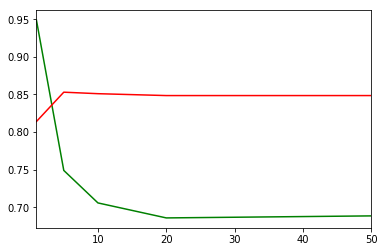

In [43]:
# We select the value of 40. Next we will apply the same method for the max depth hyperparameter
precision2 = []
accuracy2 = []
maxdepth = [1,5,10,20,50]
for i in maxdepth:
    classifier = XGBClassifier(random_state = 42 , n_estimators = 40, max_depth = i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import precision_score  
    ps = precision_score(y_test, y_pred)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    precision2.append(ps)
    accuracy2.append(acc)
    
pd.Series(precision2, maxdepth).plot(color = 'green')
pd.Series(accuracy2, maxdepth).plot(color = 'red') 

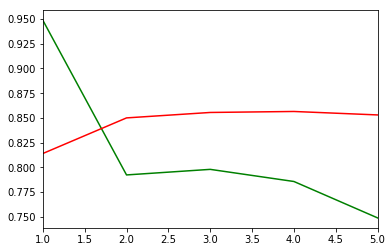

In [44]:
# The accuracy maximizes at maxdepth = 5 and remains steady afterwards. The precision on the other hand
# increases a lot as max depth decreases. Let's see what happens for maxdepth prices between 1-5
precision2 = []
accuracy2 = []
maxdepth = [1,2,3,4,5]
for i in maxdepth:
    classifier = XGBClassifier(random_state = 42 , n_estimators = 40, max_depth = i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import precision_score  
    ps = precision_score(y_test, y_pred)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    precision2.append(ps)
    accuracy2.append(acc)
    
pd.Series(precision2, maxdepth).plot(color = 'green')
pd.Series(accuracy2, maxdepth).plot(color = 'red')

In [50]:
pd.Series(accuracy2, maxdepth)

1    0.8140
2    0.8500
3    0.8555
4    0.8565
5    0.8530
dtype: float64

In [53]:
# I think I will keep the default value of max_depth = 3,meaning a precision of 79.8 % and 
# an accuracy of 85.56%, fairly good. So, if we re-calculate our metrics, after this quick,
# but not the best scientific way,we will have
classifier = XGBClassifier(random_state = 42 , n_estimators = 40, max_depth = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
clsfrprt = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
ps = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test , y_pred)
print(clsfrprt)

             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1593
          1       0.80      0.39      0.52       407

avg / total       0.85      0.86      0.83      2000



In [54]:
# A very good outcome indeed. The last two things remaining is to apply kfold validation and to compute
# the hyperparameters more "scientificly" using GridSearch.


In [61]:
# APPLYING K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
from sklearn   import metrics
precisions = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'average_precision')
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy')
print(accuracies.mean())
print(accuracies.std())
print(precisions.mean())
print(precisions.std())


0.86175
0.0067592529173
0.695766887982
0.0295169799692


In [62]:
# We can now observe that the accuracy is more solid than the precision, but still our model is very good
# and has low bias or variance. Lastly,let's apply gridsearch to find out the best params for accuracy
# and precision
from sklearn.model_selection  import GridSearchCV
parameters = [{'max_depth':[2,3,5,10 ],  'n_estimators':[20,40,80,100,200]}]
gridsearch = GridSearchCV(estimator=classifier, 
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10)
gridsearch = gridsearch.fit(X_train, y_train)
bestaccuracy = gridsearch.best_score_
bestparams = gridsearch.best_params_



In [67]:
print(bestaccuracy)
print(bestparams)

0.866125
{'max_depth': 5, 'n_estimators': 80}


In [71]:
# Applying the same, but computin the best average precision
from sklearn.model_selection  import GridSearchCV
parameters = [{'max_depth':[2,3,5,10 ],  'n_estimators':[20,40,80,100,200]}]
gridsearch = GridSearchCV(estimator=classifier, 
                          param_grid = parameters,
                          scoring = 'average_precision',
                          cv = 10)
gridsearch = gridsearch.fit(X_train, y_train)
bestprecision = gridsearch.best_score_
bestparams2 = gridsearch.best_params_

In [69]:
bestprecision


0.70960090850973123

In [72]:
bestparams2

{'max_depth': 5, 'n_estimators': 80}

In [ ]:
# To conclude, we can see that the optimal parameters using GridSearch are slightly different,
# and more precise,than the "manual" and "trial and error" procedure we used above. Our accuracy, 
# precision and f1score is much more than just "acceptable", and we should be able to predict
# a client leaving the bank very accurately. 